In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:\\Users\\Asus\\Documents\\weatherAUS.csv')
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
54279,2015-03-26,MountGinini,1.3,9.6,0.0,NaN,NaN,W,61.0,WSW,...,88.0,78.0,NaN,NaN,NaN,NaN,1.7,5.9,No,No
106296,2011-01-05,Woomera,16.1,34.3,0.0,7.2,4.4,S,41.0,W,...,29.0,15.0,1008.9,1006.9,0.0,0.0,23.1,32.5,No,No
44898,2015-08-07,Wollongong,7.9,16.3,0.0,NaN,NaN,WSW,28.0,W,...,52.0,54.0,1023.3,1021.0,NaN,NaN,12.6,14.6,No,No
59817,2013-09-30,Bendigo,8.0,24.5,0.0,3.4,NaN,NW,83.0,ENE,...,67.0,40.0,1008.9,1002.5,NaN,8.0,13.8,21.7,No,Yes
120135,2016-02-09,PerthAirport,20.9,42.5,0.0,13.4,12.6,WSW,37.0,NE,...,16.0,9.0,1014.8,1012.0,0.0,0.0,33.9,39.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
print(df.shape[0])
print(df.isna().sum(axis=0))

145460
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


<AxesSubplot:>

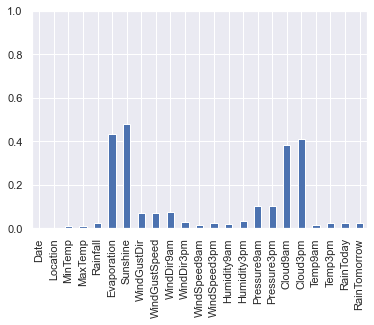

In [6]:
(df.isnull().sum()/df.shape[0]).plot(kind = 'bar', ylim = (0,1))

# Dropping column which have more than 20% missing value

In [7]:
new_df = df.isnull().sum()/df.shape[0]

In [8]:
new_df[new_df>0.2].index

Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')

In [9]:
new_df = new_df[new_df>0.2].index

In [10]:
data = df.copy()

In [11]:
df.drop(columns = new_df,inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

# filling the missing data

In [13]:
obj_col,num_col = [] , []

for i in df.columns:
    if df[i].dtype == 'object':
        obj_col.append(i)
    else:
        num_col.append(i)
print('Categorical_columns -->>',obj_col)
print('Numerical_columns  -->>', num_col)

Categorical_columns -->> ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical_columns  -->> ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


# Filling Missing values in numerical columns

In [14]:
for i in num_col:
    df[i].fillna(df[i].median(),inplace=True)

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [16]:
for i in obj_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    145460 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     145460 non-null  object 
 8   WindDir3pm     145460 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Temp9am        145460 non-null  float64
 16  Temp3pm        145460 non-null  float64
 17  RainToday      145460 non-nul

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  object        
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  object        
 8   WindDir3pm     145460 non-null  object        
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

In [21]:
df['month'] = df['Date'].dt.month

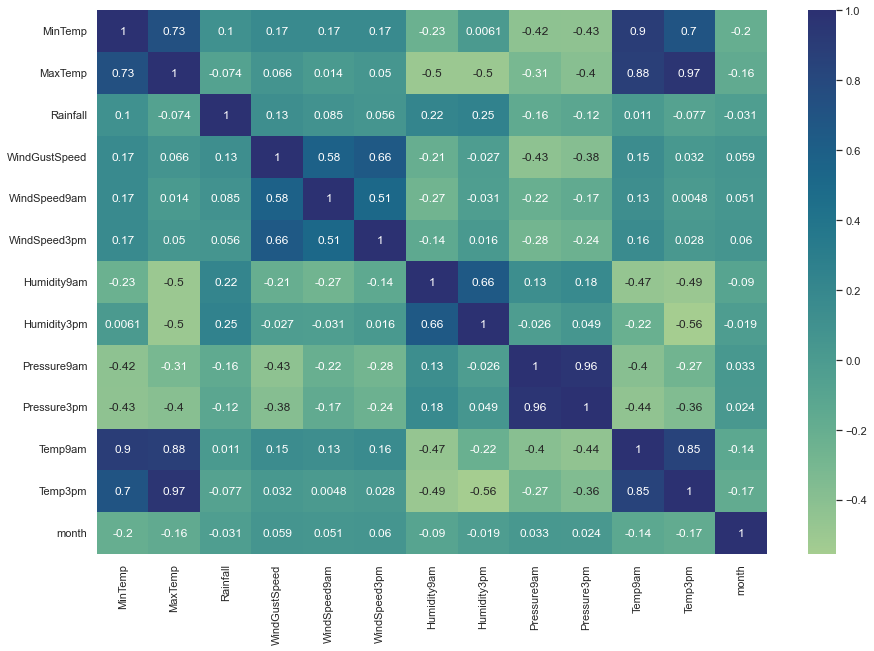

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap=sns.color_palette("crest", as_cmap=True))
plt.show()

# There are multicolinearity exist among the features

In [23]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes':1,'No':0})
df['RainToday'] = df['RainToday'].replace({'Yes':1,'No':0})

In [24]:
df.corr()['RainTomorrow']

MinTemp          0.082249
MaxTemp         -0.156523
Rainfall         0.233877
WindGustSpeed    0.220144
WindSpeed9am     0.086746
WindSpeed3pm     0.084214
Humidity9am      0.251415
Humidity3pm      0.433167
Pressure9am     -0.230950
Pressure3pm     -0.211952
Temp9am         -0.025488
Temp3pm         -0.187721
RainToday        0.305744
RainTomorrow     1.000000
month            0.007674
Name: RainTomorrow, dtype: float64

# making some features for removing multicolinearity

In [25]:
df['Pressure_Interval'] = df['Pressure9am'] - df['Pressure3pm']
df['Humidity_Interval'] = df['Humidity9am'] - df['Humidity3pm']
df['TempInterval'] = df['Temp9am'] - df['Temp3pm']
df['WindSpeedInterval'] = df['WindSpeed9am'] - df['WindSpeed3pm']
df['Temperature_Interval'] = df['MaxTemp'] - df['MinTemp']

In [26]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,month,Pressure_Interval,Humidity_Interval,TempInterval,WindSpeedInterval,Temperature_Interval
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,16.9,21.8,0,0,12,0.6,49.0,-4.9,-4.0,9.5
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,17.2,24.3,0,0,12,2.8,19.0,-7.1,-18.0,17.7
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,21.0,23.2,0,0,12,-1.1,8.0,-2.2,-7.0,12.8
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,18.1,26.5,0,0,12,4.8,29.0,-8.4,2.0,18.8
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,17.8,29.7,0,0,12,4.8,49.0,-11.9,-13.0,14.8


# drop old coerelated columns

In [27]:
df.drop(columns=['Pressure9am','Pressure3pm','MaxTemp','MinTemp','WindDir9am','WindDir3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  145460 non-null  datetime64[ns]
 1   Location              145460 non-null  object        
 2   Rainfall              145460 non-null  float64       
 3   WindGustDir           145460 non-null  object        
 4   WindGustSpeed         145460 non-null  float64       
 5   RainToday             145460 non-null  int64         
 6   RainTomorrow          145460 non-null  int64         
 7   month                 145460 non-null  int64         
 8   Pressure_Interval     145460 non-null  float64       
 9   Humidity_Interval     145460 non-null  float64       
 10  TempInterval          145460 non-null  float64       
 11  WindSpeedInterval     145460 non-null  float64       
 12  Temperature_Interval  145460 non-null  float64       
dtyp

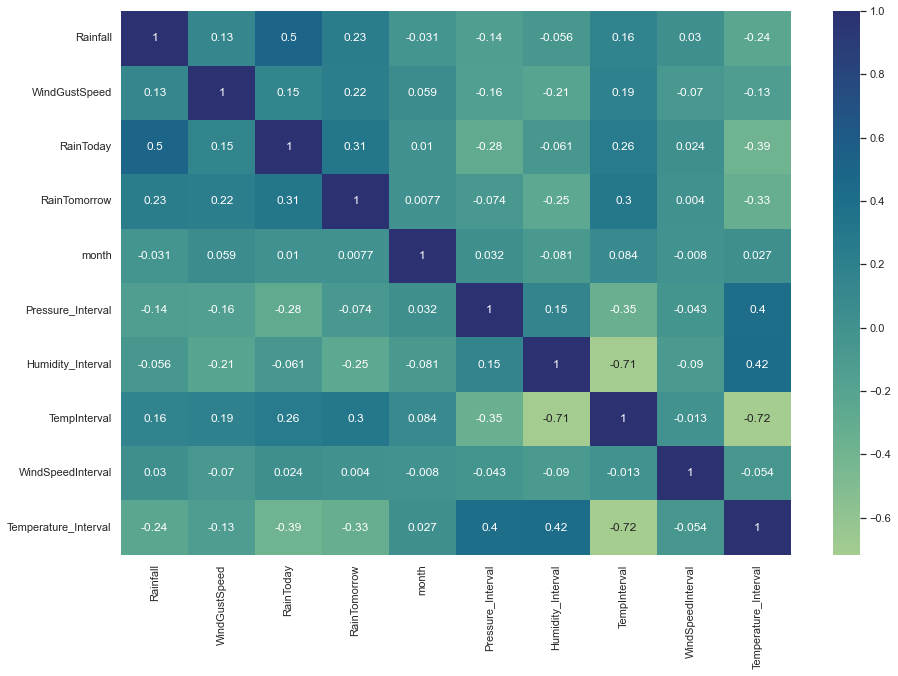

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap=sns.color_palette("crest", as_cmap=True))
plt.show()

In [30]:
df.corr()['RainTomorrow']

Rainfall                0.233877
WindGustSpeed           0.220144
RainToday               0.305744
RainTomorrow            1.000000
month                   0.007674
Pressure_Interval      -0.074356
Humidity_Interval      -0.253216
TempInterval            0.301906
WindSpeedInterval       0.003993
Temperature_Interval   -0.329356
Name: RainTomorrow, dtype: float64

In [31]:
df.describe()

,Rainfall,WindGustSpeed,RainToday,RainTomorrow,month,Pressure_Interval,Humidity_Interval,TempInterval,WindSpeedInterval,Temperature_Interval
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,2.307990,39.962189,0.219167,0.219146,6.399615,2.394653,17.347855,-4.681815,-4.639007,11.023908
std,8.389771,13.120931,0.413683,0.413669,3.427262,1.903023,16.298343,3.715172,8.681580,4.958376
min,0.000000,6.000000,0.000000,0.000000,1.000000,-20.300000,-91.000000,-26.400000,-78.000000,-14.700000
25%,0.000000,31.000000,0.000000,0.000000,3.000000,1.500000,6.000000,-7.200000,-10.000000,7.200000
50%,0.000000,39.000000,0.000000,0.000000,6.000000,2.400000,17.000000,-4.400000,-4.000000,10.500000
75%,0.600000,46.000000,0.000000,0.000000,9.000000,3.500000,28.000000,-2.100000,0.000000,14.400000
max,371.000000,135.000000,1.000000,1.000000,12.000000,26.500000,91.000000,21.100000,111.000000,31.400000


C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<AxesSubplot:xlabel='Temperature_Interval', ylabel='Density'>

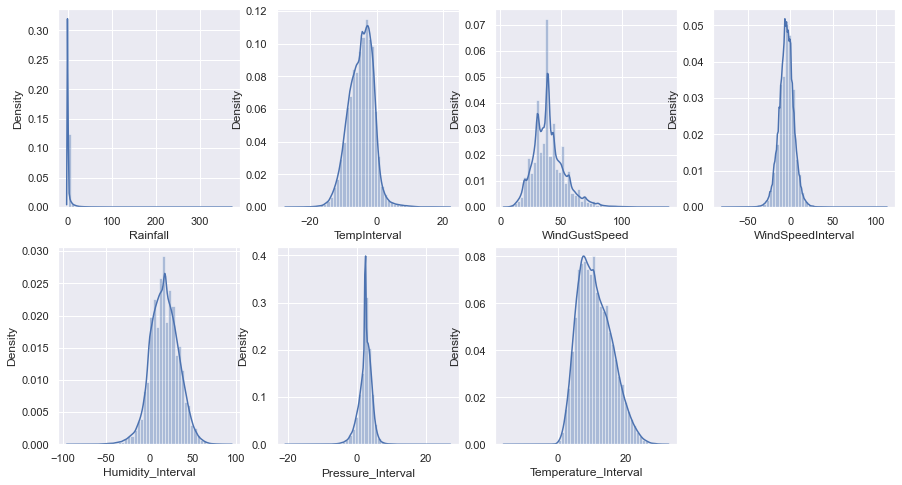

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df['Rainfall'])


plt.subplot(2,4,2)
sns.distplot(df['TempInterval'])


plt.subplot(2,4,3)
sns.distplot(df['WindGustSpeed'])


plt.subplot(2,4,4)
sns.distplot(df['WindSpeedInterval'])


plt.subplot(2,4,5)
sns.distplot(df['Humidity_Interval'])


plt.subplot(2,4,6)
sns.distplot(df['Pressure_Interval'])


plt.subplot(2,4,7)
sns.distplot(df['Temperature_Interval'])

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus

<AxesSubplot:xlabel='Temperature_Interval'>

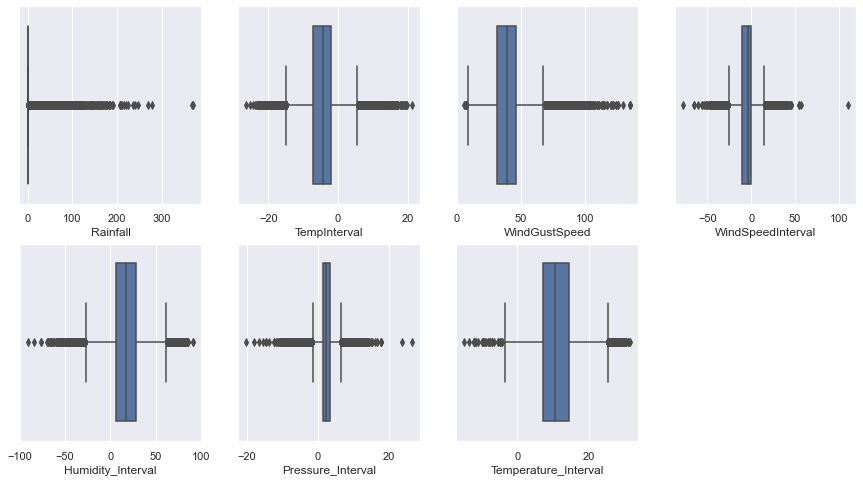

In [33]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.boxplot(df['Rainfall'])


plt.subplot(2,4,2)
sns.boxplot(df['TempInterval'])


plt.subplot(2,4,3)
sns.boxplot(df['WindGustSpeed'])


plt.subplot(2,4,4)
sns.boxplot(df['WindSpeedInterval'])


plt.subplot(2,4,5)
sns.boxplot(df['Humidity_Interval'])


plt.subplot(2,4,6)
sns.boxplot(df['Pressure_Interval'])


plt.subplot(2,4,7)
sns.boxplot(df['Temperature_Interval'])

In [34]:
q1 = df['Rainfall'].quantile(0.25)
q2= df['Rainfall'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

1.5 -0.8999999999999999


In [35]:
new_df = df[(df['Rainfall']>ll)&(df['Rainfall']<ul)]

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

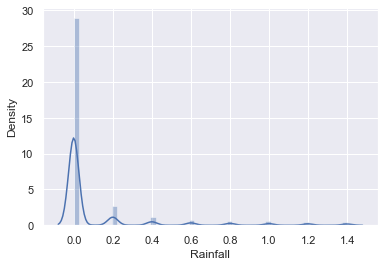

In [36]:
sns.distplot(new_df['Rainfall'])

In [37]:
q1 = new_df['Temperature_Interval'].quantile(0.25)
q2= new_df['Temperature_Interval'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

25.800000000000004 -2.200000000000008


In [38]:
new_df = new_df[(new_df['Temperature_Interval']>ll)&(new_df['Temperature_Interval']<ul)]

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature_Interval', ylabel='Density'>

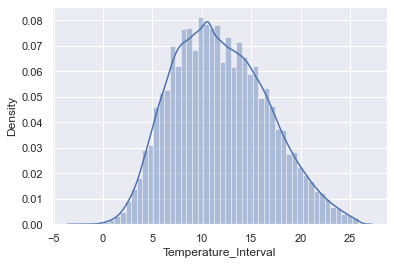

In [39]:
sns.distplot(new_df['Temperature_Interval'])

In [40]:
q1 = new_df['TempInterval'].quantile(0.25)
q2= new_df['TempInterval'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

5.299999999999999 -15.499999999999998


In [41]:
new_df = new_df[(new_df['TempInterval']>ll)&(new_df['TempInterval']<ul)]

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TempInterval', ylabel='Density'>

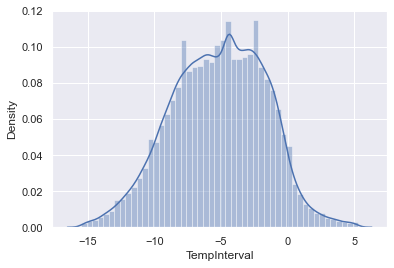

In [42]:
sns.distplot(new_df['TempInterval'])

In [43]:
q1 = new_df['WindGustSpeed'].quantile(0.25)
q2= new_df['WindGustSpeed'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

63.5 11.5


In [44]:
new_df = new_df[(new_df['WindGustSpeed']>ll)&(new_df['WindGustSpeed']<ul)]

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

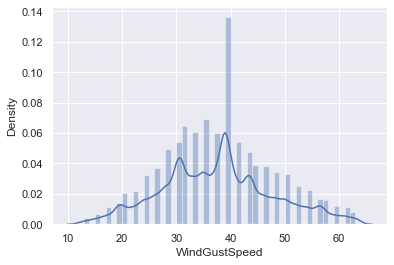

In [45]:
sns.distplot(new_df['WindGustSpeed'])

In [46]:
q1 = new_df['WindSpeedInterval'].quantile(0.25)
q2= new_df['WindSpeedInterval'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

15.0 -25.0


In [47]:
new_df = new_df[(new_df['WindSpeedInterval']>ll)&(new_df['WindSpeedInterval']<ul)]

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WindSpeedInterval', ylabel='Density'>

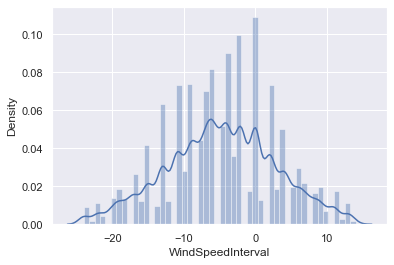

In [48]:
sns.distplot(new_df['WindSpeedInterval'])

In [49]:
q1 = new_df['Pressure_Interval'].quantile(0.25)
q2= new_df['Pressure_Interval'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

6.400000000000034 -0.8000000000002387


In [50]:
new_df = new_df[(new_df['Pressure_Interval']>ll)&(new_df['Pressure_Interval']<ul)]

C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure_Interval', ylabel='Density'>

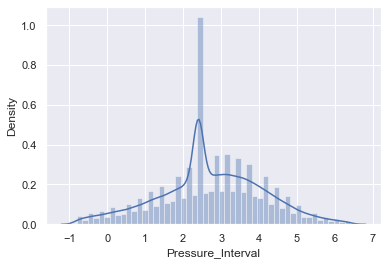

In [51]:
sns.distplot(new_df['Pressure_Interval'])

In [52]:
q1 = new_df['Humidity_Interval'].quantile(0.25)
q2= new_df['Humidity_Interval'].quantile(0.75)

iqr =  q2-q1

ul = q2 + 1.5*iqr
ll = q1 - 1.5*iqr

print(ul, ll)

new_df = new_df[(new_df['Humidity_Interval']>ll)&(new_df['Humidity_Interval']<ul)]

60.5 -23.5


C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus

<AxesSubplot:xlabel='Temperature_Interval'>

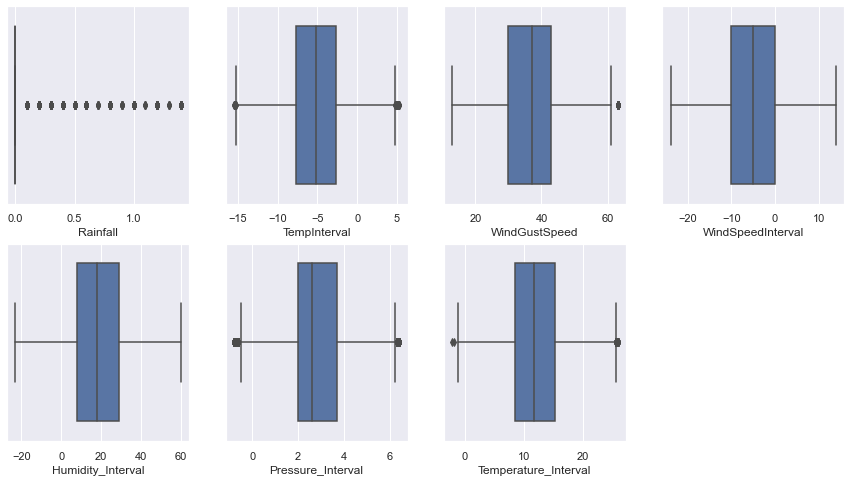

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.boxplot(new_df['Rainfall'])


plt.subplot(2,4,2)
sns.boxplot(new_df['TempInterval'])


plt.subplot(2,4,3)
sns.boxplot(new_df['WindGustSpeed'])


plt.subplot(2,4,4)
sns.boxplot(new_df['WindSpeedInterval'])


plt.subplot(2,4,5)
sns.boxplot(new_df['Humidity_Interval'])


plt.subplot(2,4,6)
sns.boxplot(new_df['Pressure_Interval'])


plt.subplot(2,4,7)
sns.boxplot(new_df['Temperature_Interval'])

In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102203 entries, 0 to 145459
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  102203 non-null  datetime64[ns]
 1   Location              102203 non-null  object        
 2   Rainfall              102203 non-null  float64       
 3   WindGustDir           102203 non-null  object        
 4   WindGustSpeed         102203 non-null  float64       
 5   RainToday             102203 non-null  int64         
 6   RainTomorrow          102203 non-null  int64         
 7   month                 102203 non-null  int64         
 8   Pressure_Interval     102203 non-null  float64       
 9   Humidity_Interval     102203 non-null  float64       
 10  TempInterval          102203 non-null  float64       
 11  WindSpeedInterval     102203 non-null  float64       
 12  Temperature_Interval  102203 non-null  float64       
dtyp

In [55]:
new_df.drop(columns = ['Date','month'],axis=1,inplace=True)

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102203 entries, 0 to 145459
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Location              102203 non-null  object 
 1   Rainfall              102203 non-null  float64
 2   WindGustDir           102203 non-null  object 
 3   WindGustSpeed         102203 non-null  float64
 4   RainToday             102203 non-null  int64  
 5   RainTomorrow          102203 non-null  int64  
 6   Pressure_Interval     102203 non-null  float64
 7   Humidity_Interval     102203 non-null  float64
 8   TempInterval          102203 non-null  float64
 9   WindSpeedInterval     102203 non-null  float64
 10  Temperature_Interval  102203 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 9.4+ MB


In [57]:
jk = new_df.copy()

<AxesSubplot:ylabel='RainTomorrow'>

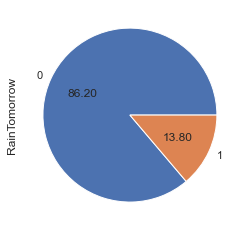

In [58]:
new_df['RainTomorrow'].value_counts().plot(kind='pie',autopct='%0.2f')

In [59]:
obj_col = []

for i in new_df.columns:
    if new_df[i].dtype == 'object':
        obj_col.append(i)

In [60]:
print(obj_col)

['Location', 'WindGustDir']


In [61]:
# one hot encoding function for categorical features 
def onehot_encoder(df, cols):
    data = df.copy()
    for col in cols:
        dummies = pd.get_dummies(data[col],drop_first=True,prefix=col)
        # concatenating dummies and original dataframe
        data = pd.concat([data, dummies], axis=1)
        
        # dropping original columns for which encoding is applied.
        data.drop(col, axis=1,inplace=True)
    return data

In [62]:
new_data = onehot_encoder(new_df,obj_col)

In [63]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102203 entries, 0 to 145459
Data columns (total 72 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rainfall                   102203 non-null  float64
 1   WindGustSpeed              102203 non-null  float64
 2   RainToday                  102203 non-null  int64  
 3   RainTomorrow               102203 non-null  int64  
 4   Pressure_Interval          102203 non-null  float64
 5   Humidity_Interval          102203 non-null  float64
 6   TempInterval               102203 non-null  float64
 7   WindSpeedInterval          102203 non-null  float64
 8   Temperature_Interval       102203 non-null  float64
 9   Location_Albany            102203 non-null  uint8  
 10  Location_Albury            102203 non-null  uint8  
 11  Location_AliceSprings      102203 non-null  uint8  
 12  Location_BadgerysCreek     102203 non-null  uint8  
 13  Location_Ballarat          10

In [64]:
from sklearn.model_selection import train_test_split
X = new_data.drop('RainTomorrow',axis=1)
Y = new_data['RainTomorrow']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [67]:
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()
model.add(Dense(units = 15, activation = 'relu', input_dim = 71))
model.add(Dense(units =10 , activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                1080      
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
2300/2300 [==============================] - 9s 3ms/step - loss: 0.3752 - accuracy: 0.8501 - val_loss: 0.3347 - val_accuracy: 0.8709
Epoch 2/10
2300/2300 [==============================] - 8s 3ms/step - loss: 0.3328 - accuracy: 0.8735 - val_loss: 0.3290 - val_accuracy: 0.8755
Epoch 3/10
2300/2300 [==============================] - 8s 3ms/step - loss: 0.3269 - accuracy: 0.8757 - val_loss: 0.3254 - val_accuracy: 0.8771
Epoch 4/10
2300/2300 [==============================] - 7s 3ms/step - loss: 0.3228 - accuracy: 0.8764 - val_loss: 0.3243 - val_accuracy: 0.8759
Epoch 5/10
2300/2300 [==============================] - 8s 3ms/step - loss: 0.3202 - accuracy: 0.8772 - val_loss: 0.3226 - val_accuracy: 0.8750
Epoch 6/10
2300/2300 [==============================] - 8s 3ms/step - loss: 0.3184 - accuracy: 0.8778 - val_loss: 0.3226 - val_accuracy: 0.8748
Epoch 7/10
2300/2300 [==============================] - 8s 3ms/step - loss: 0.3169 - accuracy: 0.8781 - val_loss: 0.3226 - val_accuracy:

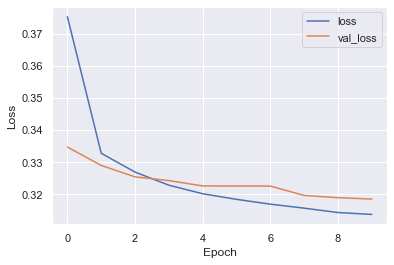

In [75]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

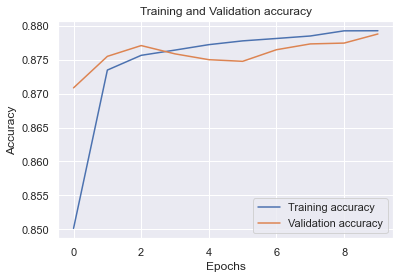

In [76]:
plt.plot(history_df.loc[:, ['accuracy']], label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
predictions = model.predict(x_test_scaled)

639/639 [==============================] - 6s 2ms/step


In [80]:
y_pred = list(map(lambda x: np.argmax(x), predictions))

In [81]:
print(f"Model Accuracy: {model.evaluate(x_test_scaled, y_test)[1]}")

639/639 [==============================] - 2s 3ms/step - loss: 0.3172 - accuracy: 0.8772
Model Accuracy: 0.8772075772285461


In [82]:
print(f"Model roc_auc_score: {roc_auc_score(y_test, y_pred)}")

Model roc_auc_score: 0.6014317363567713


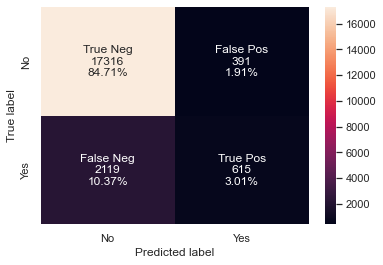

In [83]:
cm = confusion_matrix(y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ['No','Yes']


sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [84]:
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     17707
           1       0.61      0.22      0.33      2734

    accuracy                           0.88     20441
   macro avg       0.75      0.60      0.63     20441
weighted avg       0.85      0.88      0.85     20441

